**SynaNN Regression by JAX for Machine Learning**

**Introduction**

Bhaskara formula is an elegant and accurate rational sine approximation. In this program we are going to introduce Reversible Synaptic NeuralNetwork (SynaNN) that can represent the sin(pi*x) approximation in the (0,1) interval. Furthermore, we are going to apply the Machine Learning with grident descent to do SynaNN regression. The program is implemented by JAX framework of Python. 
It has been shown that how the Bhaskara formula is accuracy for practical applications.  

Given x ∈ [0, 1], Bhaskara sin(πx) approximation is a rational function,

>> sin(πx) = 4 ∗4/5*x*(1 − x)/(1 − 4/5*x*(1 − x))

In [11]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, random
import numpy as np
import math
import matplotlib.pyplot as plt

**Reversible SynaNN Library**

A reversible computing means that the computational process of a model is reversible. Since per irreversible bit operation will generate energy dissipation or heat, reversible units can remove the dissipation so it has the highest energy efficiency. The universal reversible computing is good for low-power consumption.

Given two variables x, y and two parameters α, β, the synapse function S(x, y; α, β) is defined as:

>> S(x, y; α, β) = αx(1 − βy)


where x and y are real variables and x, y ∈ [0, 1]; α ≥ 0 and β ≥ 0 are real parameters. Synaptic Neural Network (SynaNN) is the connection of synapses and neurons.

A Reversible Synaptic Neural Network is a special connectionof SynaNN. It consists of two input variables, four parameters, and two outputs called S1 and S2, which is defined as

>> S1(x, y; α1, β1) = S(x, y; α1, β1)

>> S2(x, y; α2, β2) = S(y, S1(x, y, α1, β1); α2, β2) 

where S1 is the positive output and S2 is the negative output.


In [12]:
# jit specifies Just-in-time compilation function
# syna 
@jit
def syna(x,y,a,b):
  return a*x*(1-b*y)

# forward syna
@jit
def _syna(x1, x2, W):
  s1 = x1*syna(1, x2, W[0], W[1])
  s2 = x2*syna(1, s1, W[2], W[3])
  return s1,s2

# backward syna
@jit
def syna_(s1, s2, W):
  x2 = s2/syna(1, s1, W[2], W[3])
  x1 = s1/syna(1, x2, W[0], W[1])
  return (x1, x2)

# ML sin(pi*x) approximation formula in (0,1)
@jit
def sin_ml(x, W):
  s1 = x*syna(1, x, W[0], W[1])
  s2 = x*syna(1, s1, W[2], W[3])
  s = s1/s2*4.0*x
  return s

**Machine Learning Functions**

predict, loss, and update functions implement the regression through machine learning framework JAX. 

1.   predict is the model of the neural network.
2.   loss is the minimum function of comparsion.
3.   update is the procesdure to modify the parameters by gradient descent through grad function in JAX.

In [13]:
def predict(theta, x):
  return sin_ml(x, theta)

def loss(theta, x, y):
  return jnp.mean((predict(theta,x)-y)**2)

def update(theta, x, y, lr=0.1):
  return theta-lr*grad(loss)(theta, x, y)


**Draw Curves**

Draw sin(pi*x) in [0.0+e, 1.0-e]

The params of the Bhaskara formula are theta=[4./5., 1.0, 1.0, 1.0]. We see that the approximate curve is crossing and linking the centers of the sin(pi*x) sample points. An interesting behavior is that if the initial params are setting as Bhaskara formula, then the Machie Learning returns the same values as the initial params. 
By adding noise to the sine function, we can do regression with the reversible synapse neural network.

[0.8006282 1.000205  1.000112  1.0006301]


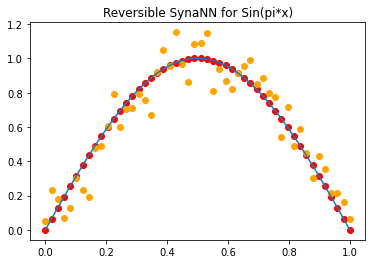

In [14]:
interval=50
noise = np.random.normal(scale=0.1, size=(interval,))
epsilon=1e-10 
xs = jnp.linspace(0.+epsilon, 1.-epsilon, interval)
ys = jnp.sin(math.pi*xs)
plt.scatter(xs, ys, color='red')
plt.scatter(xs, ys+noise, color='orange')

# draw syna regression with params
theta = jnp.array([0.8, 1.0, 1.0, 1.0])
for _ in range(1000):
  theta = update(theta, xs, ys)

plt.title("Reversible SynaNN for Sin(pi*x)")
plt.plot(xs, predict(theta, xs))

print(theta)

**Summary**

We see how simple to implement the SynaNN regression by JAX with Machine Learning. This example is a pattern to apply AI/ML on various applictions such as IoT and sensors. Synapse Neural Network (SynaNN) is simply and widely working on various physical and experimental formula. 

**References**

(PDF) Reversible Synaptic Neural Network (SynaNN) from Bhaskara Sine Approximation to Random Matrix and Zeta Function. Chang Li (2017)

Available from: https://www.researchgate.net/publication/326464136_Reversible_Synaptic_Neural_Network_SynaNN_from_Bhaskara_Sine_Approximation_to_Random_Matrix_and_Zeta_Function